<center>

#*Entregable ANS - Grupo 6*



## Consignas:

Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia. Realice comentarios en cada parte (verbose=True ;))

**1-** Análisis exploratorio inicial de la base.

**2-** Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.

**3-** Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

**4-** Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración…

**5-** Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?

**6-** Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

## Respuestas

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans,MeanShift

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1p2L71BpPdp7Xybq8Lz8CTVQKmD_fnSze'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv('dataset.csv', encoding='latin-1')

Downloading...
From: https://drive.google.com/uc?id=1p2L71BpPdp7Xybq8Lz8CTVQKmD_fnSze
To: /content/dataset.csv
100%|██████████| 94.2M/94.2M [00:00<00:00, 98.0MB/s]


### 1- Análisis exploratorio

In [ ]:
df.head(1)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,...,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png


In [ ]:
df.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_id,league_level,club_team_id,club_jersey_number,club_contract_valid_until_year,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,4.831000e+03,4831.000000,181361.000000,181361.000000,181361.000000,4876.000000,4785.0,4876.000000,4876.000000,4785.000000,181361.000000,177364.000000,177364.000000,181361.000000,181361.000000,181361.000000,4.750000e+03,158620.000000,158620.000000,158620.000000,158620.000000,158620.000000,158620.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,165358.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,22734.000000
mean,234662.993907,19.223538,36.727703,76.269909,79.672967,1.668368e+07,818.505485,26.014099,168.756464,61.213580,2215.473749,1.0,116009.965135,14.876743,2023.980564,69.767910,113079.558980,12.334437,3.009076,2.630395,1.873975,3.688577e+07,73.402276,60.660768,65.576964,70.659747,58.155624,68.194238,56.995925,53.306279,59.302242,66.266739,47.748656,61.884633,51.623734,49.125711,59.852813,66.702825,68.804605,69.254779,65.316645,73.897916,70.941195,61.083425,66.757065,69.108088,65.829671,54.569681,57.246817,52.412172,57.214572,58.513379,56.899824,65.901831,51.068036,53.018157,50.268448,18.835229,18.754556,18.662866,18.663698,19.042451,38.851368
std,10659.745380,2.060414,23.555409,5.709719,5.422202,2.425583e+07,468.435485,3.907456,6.249204,5.563279,11.005618,0.0,429.755946,10.042014,1.326126,57.797635,335.705441,7.179928,0.704869,0.938435,1.049086,5.263566e+07,9.073919,16.733505,10.682237,10.088860,20.190376,9.292172,21.718202,24.658935,20.665936,18.129016,22.081826,22.312497,21.377552,20.002520,18.703134,19.774988,15.294865,14.553493,14.204997,7.861919,12.920497,17.511987,9.985984,15.449297,13.760278,22.775769,20.196639,25.430340,24.212549,18.510961,17.848720,15.083996,25.330264,25.906942,25.447561,21.643235,21.037389,20.595448,21.286970,22.017637,10.145185
min,226177.000000,16.000000,1.000000,49.000000,49.000000,3.250000e+05,500.000000,16.000000,150.000000,45.000000,2136.000000,1.0,113000.000000,1.000000,2022.000000,4.000000,112998.000000,-1.000000,1.000000,1.000000,1.000000,7.150000e+05,30.000000,20.000000,26.000000,30.000000,16.000000,34.000000,5.000000,4.000000,5.000000,11.000000,3.000000,4.000000,4.000000,7.000000,12.000000,8.000000,15.000000,15.000000,19.000000,30.000000,26.000000,12.000000,15.000000,14.000000,21.000000,4.000000,12.000000,4.000000,3.000000,10.000000,10.000000,11.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,17.000000
25%,227117.000000,17.000000,16.000000,72.000000,76.000000,2.600000e+06,500.000000,23.000000,164.000000,57.000000,2216.000000,1.0,116014.000000,7.000000,2023.000000,27.000000,113001.000000,6

El Data set contiene informacion sobre el desempeño de diferentes jugadoras femeninas en cada version del videojuego FIFA desde la version 16 hasta la 23, relevando sus caracteristicas a traves de 110 atributos.

Estos van desde lo personal (`player_id`, `age`, `height_cm`, etc) hasta caracteristicas de su desempeño deportivo (`league_elvel`, `shooting`, `defending`, etc).

Como la informacion personal no es de interes para este estudio, se va a trabajar solo con las columnas de desempeño fisico.


<Axes: >

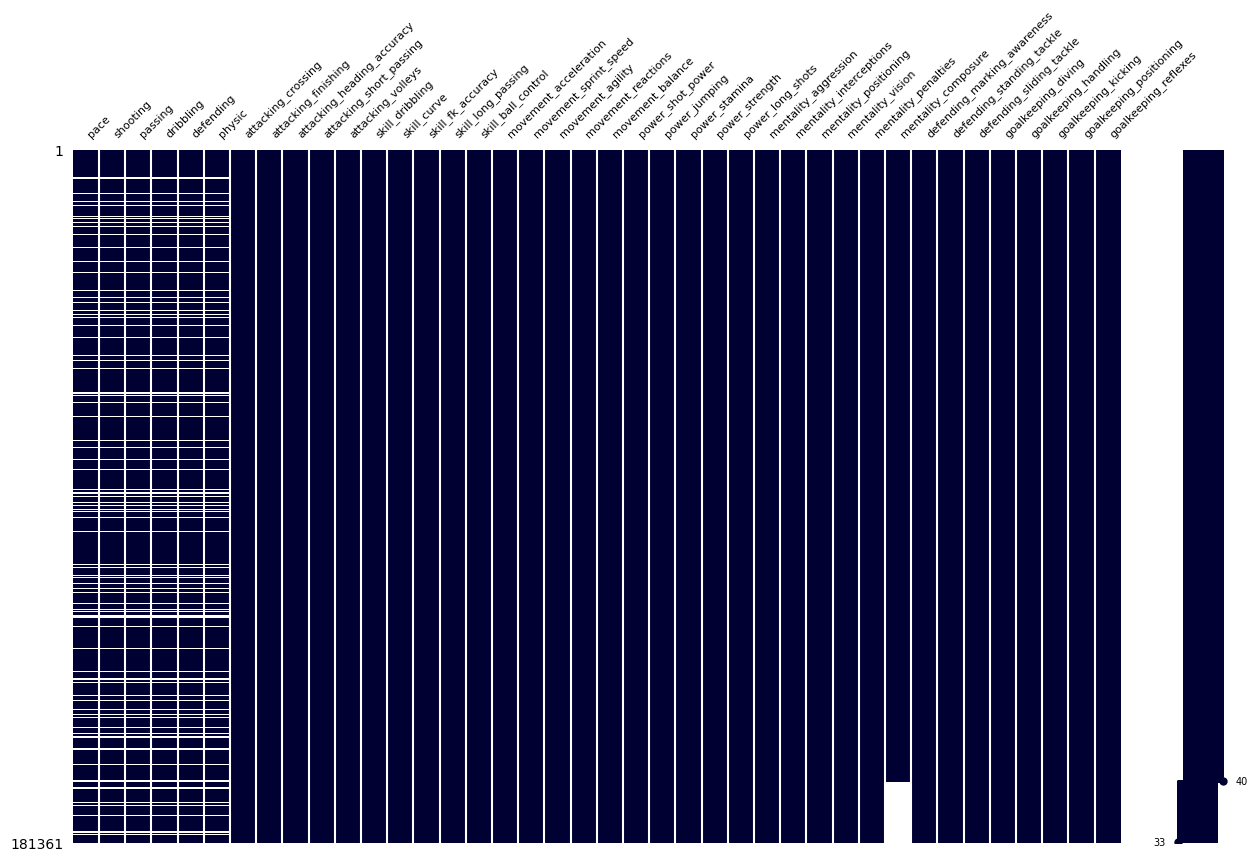

In [ ]:
import missingno as msno

interesting_columns = list(df.columns)[41:81]
interesting_df = df[interesting_columns]

msno.matrix(interesting_df, figsize=(15, 9), fontsize=8, color=[0,0,0.2])

In [ ]:
interesting_df.isna().sum()

pace                           22741
shooting                       22741
passing                        22741
dribbling                      22741
defending                      22741
physic                         22741
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
skill_dribbling                    0
skill_curve                        0
skill_fk_accuracy                  0
skill_long_passing                 0
skill_ball_control                 0
movement_acceleration              0
movement_sprint_speed              0
movement_agility                   0
movement_reactions                 0
movement_balance                   0
power_shot_power                   0
power_jumping                      0
power_stamina                      0
power_strength                     0
power_long_shots                   0
mentality_aggression               0
m

Si bien el dataset posee valores valtantes, estos parecen tener una correspondencia principalemnte entre las primeras 6 columnas de interes (pace, shooting, passing, dribbling, defending y physic). Dado a que los datos faltantes solo componen un 12% aproximadamente de todo el conjunto, para este trabajo se optara por descartar esos valores.

<Axes: >

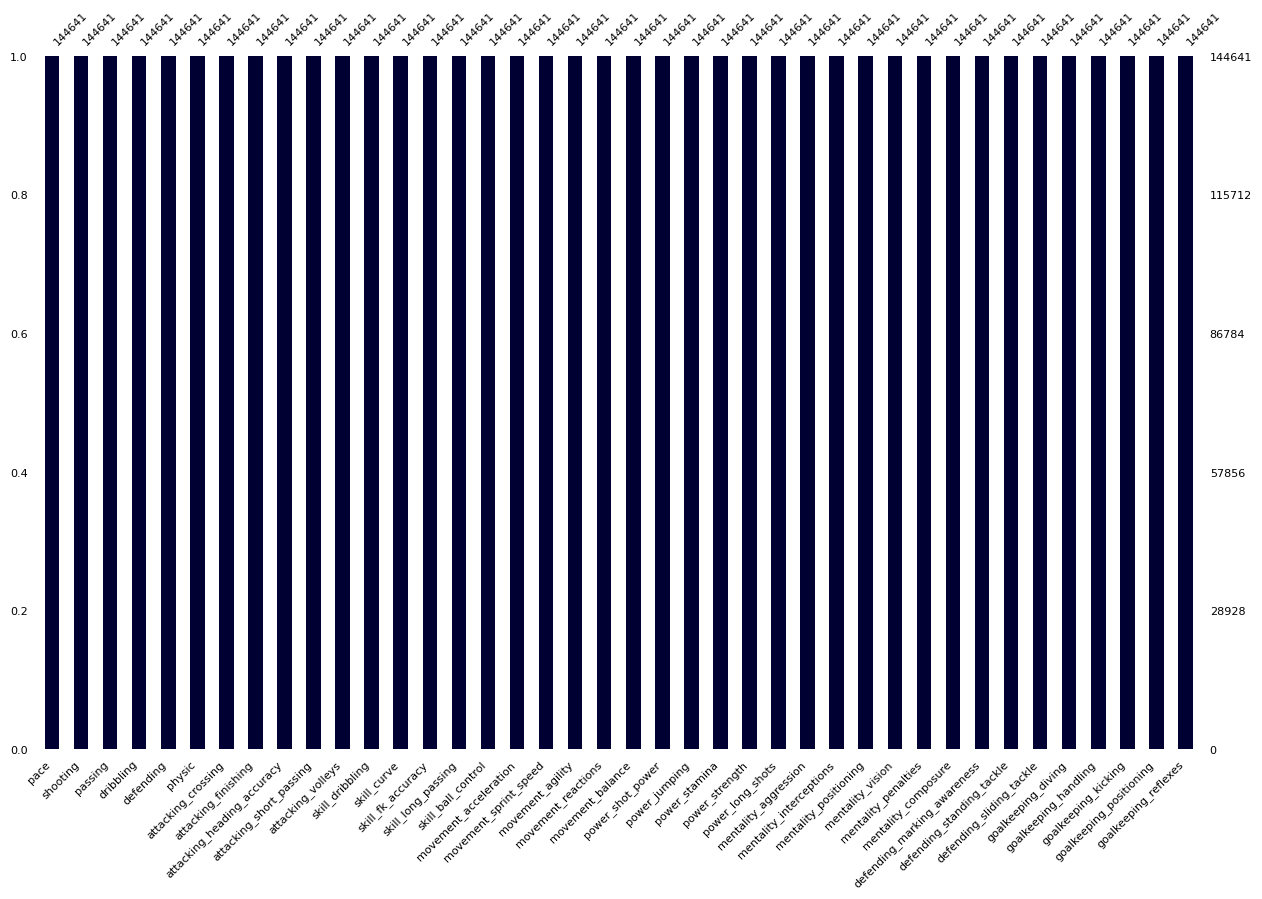

In [ ]:
interesting_df = interesting_df.dropna()

msno.bar(interesting_df, figsize=(15, 9), fontsize=8, color=[0,0,0.2])

###2- Evaluación visual
Para analizar la correlacion entre las diferentes columnas vamos a hacer un scatterplot de las columnas que tengan algo que ver con la habilidad passing, dado a que hacer un grafico cruzado de todas las columnas es demasiado.

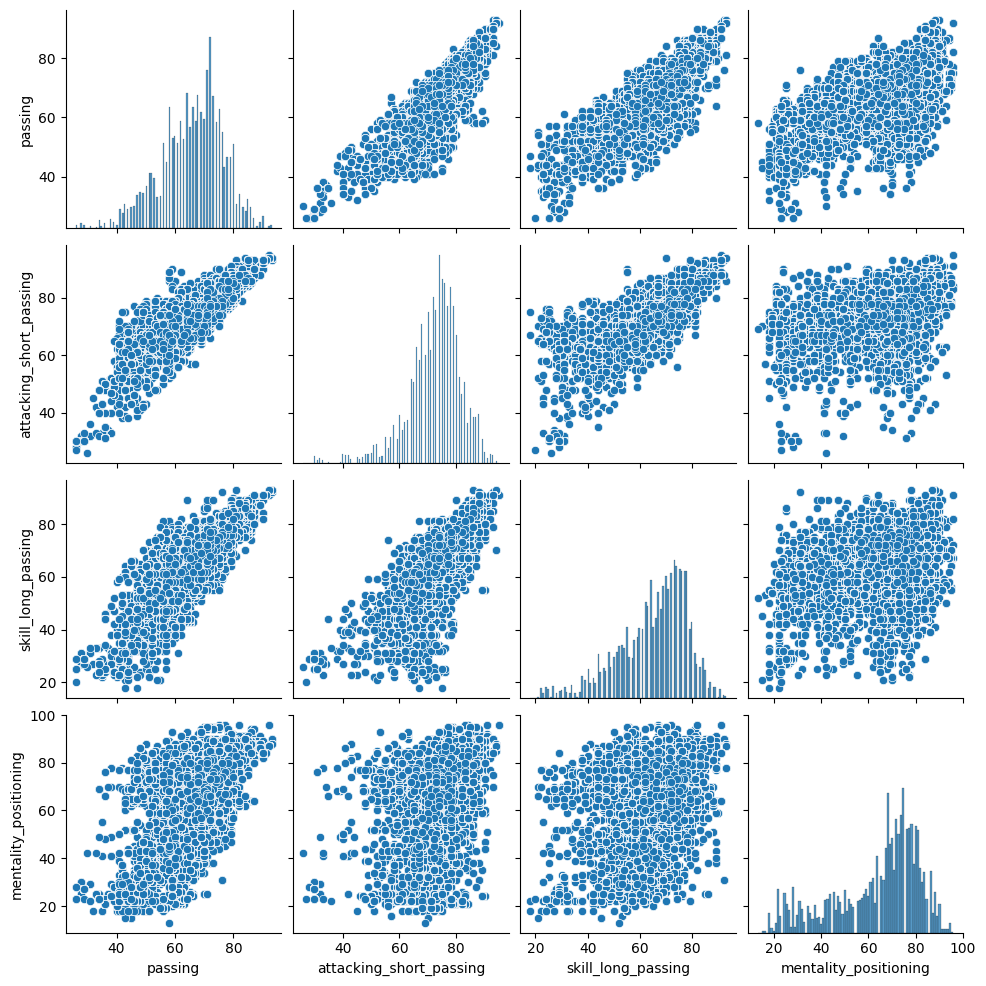

In [ ]:
passing_cols = [
    'passing',
    'attacking_short_passing',
    'skill_long_passing',
    'mentality_positioning'
]

sns.pairplot(interesting_df[passing_cols])

Para el caso de mentality_positioning no parece haber una clara correlacion con el resto de variables seleccionadas, sin embargo analizando el grafico de barras se puede establecer la presencia de 3 grupos distintos con una aparente distribucion gaussianas con un score de media de 25 para el primer grupo, 45 para el segundo y 75 aproximadamente para el tercero.

En el resto de columnas se puede ver que poseen una correlacion entre si, lo cual es esperable, dado a que se escogieron estrategicamente las columnas del dataset que describen bajo diferentes metricas las habilidades de pase de la jugadora.

###3- Normalizacion-Escalado
Primero hay que llevar a cabo un analisis sobre el rango de valores que toman las columnas de interes del dataset.

In [ ]:
interesting_df.describe()

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000,144641.000000
mean,73.488340,60.754461,65.754648,70.783312,58.255211,68.081332,63.239268,59.462787,65.621110,72.431053,52.748232,68.896869,57.048631,54.064422,65.255460,73.510540,73.267345,73.634813,68.587676,74.292241,73.689244,64.678978,67.441286,73.730505,67.717106,60.588021,62.024813,57.644050,63.882025,61.966600,61.368160,69.717743,56.546989,58.642985,55.530617,10.857592,11.008089,11.082508,10.797602,10.908256
std,9.061403,16.751507,10.637755,10.090266,20.152329,9.366629,15.611727,20.288759,12.815273,9.287797,18.633503,13.765807,17.101906,16.122560,13.086669,8.873179,9.949345,8.834506,11.172268,7.519168,11.041372,14.153590,9.917431,9.058354,12.639958,17.562167,16.336991,22.856383,18.019750,16.099014,13.262139,10.474124,22.478821,22.774438,22.902679,3.314079,3.414624,3.323361,3.333448,3.380682
min,30.000000,20.000000,26.000000,30.000000,16.000000,34.000000,20.000000,12.000000,27.000000,26.000000,12.000000,15.000000,12.000000,20.000000,18.000000,26.000000,31.000000,30.000000,32.000000,32.000000,30.000000,13.000000,15.000000,32.000000,21.000000,10.000000,15.000000,10.000000,13.000000,20.000000,17.000000,22.000000,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,68.000000,48.000000,59.000000,66.000000,40.000000,62.000000,53.000000,42.000000,58.000000,68.000000,36.000000,63.000000,44.000000,41.000000,58.000000,68.000000,67.000000,68.000000,60.000000,70.000000,68.000000,55.000000,61.000000,68.000000,60.000000,48.000000,50.000000,36.000000,53.000000,50.000000,52.000000,63.000000,37.000000,38.000000,33.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,74.000000,66.000000,67.000000,73.000000,66.000000,69.000000,67.000000,66.000000,68.000000,74.000000,55.000000,72.000000,60.000000,54.000000,68.000000,75.000000,74.000000,74.000000,70.000000,74.000000,75.000000,68.000000,68.000000,74.000000,70.000000,66.000000,65.000000,68.000000,69.000000,65.000000,62.000000,71.000000,65.000000,69.000000,65.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,80.000000,74.000000,73.000000,77.000000,75.000000,75.000000,75.000000,75.000000,75.000000,78.000000,68.000000,78.000000,70.000000,67.000000,75.000000,79.000000,80.000000,79.000000,76.000000,79.000000,81.000000,75.000000,74.000000,80.000000,76.000000,74.000000,75.000000,76.000000,77.000000,75.000000,72.000000,77.000000,75.000000,77.000000,75.000000,13.000000,14.000000,14.000000,13.000000,13.000000
max,96.000000,93.000000,93.000000,93.000000,93.000000,89.000000,94.000000,95.000000,96.000000,95.000000,92.000000,95.000000,93.000000,94.000000,93.000000,94.000000,95.000000,96.000000,94.000000,95.000000,99.000000,92.000000,94.000000,94.000000,94.000000,92.000000,95.000000,94.000000,96.000000,95.000000,93.00

Para las columnas de interes, no es necesario realizar un reescaleo de los valores, dado a que todas las columnas poseen una valoracion del score de 0 a 100, por lo que pueden ser usadas per-se para una analisis de cluster.

### 4- Aplicación de clustering

Primero filtramos el df para quedarnos únicamente con las variables correspondientes a las habilidades (skills). Las mismas se pueden trabajar como si estuvieran escaladas de antemano, porque se trata de valores que van del 0 al 100. Por ende, se pueden aplicar algoritmos de clustering sin inconveniente.

In [ ]:
# Exclude all player attribute playing as ... columns
# Exclude all non-attribute colums

interesting_columns = list(df.columns)[41:81]
interesting_df = df[interesting_columns]
interesting_df.head()

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13
1,63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15
2,89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11
3,83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14
4,85.0,77.0,82.0,83.0,88.0,89.0,87,73,82,85,66,79,88,81,80,85,85,85,86,89,82,85,92,90,90,86,82,85,73,73,62,86.0,89,91,89,10,14,16,8,15


In [ ]:
# Eliminamos los NAs
interesting_df = interesting_df.dropna()

#### 4.1- K-Medias

Primero corremos el algoritmo para un rango de valores para el hiperparámetro de la cantidad de grupos/clusters

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

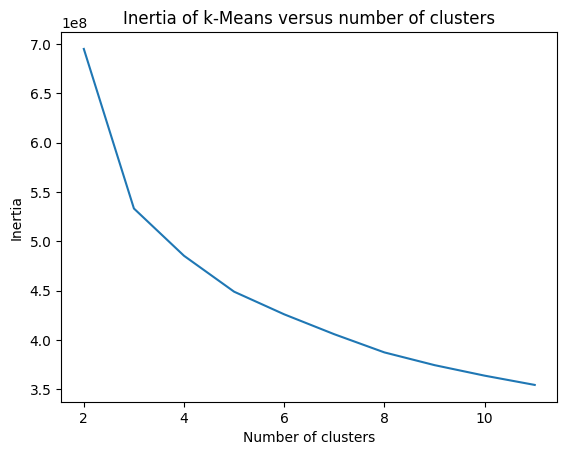

In [ ]:
from sklearn.cluster import KMeans,MeanShift

scores = [KMeans(n_clusters=i).fit(interesting_df).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

En función del gráfico del método del codo, se decide que el número óptimo de clusters es 3, porque a partir de allí la gráfica comienza a descender de forma casi lineal. Con esta información corremos el modelo con n=3.

In [ ]:
n_clust = 3

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(interesting_df)

clusters = km.labels_

Definimos una funcion que nos permite agrupar las distintas tipos de posiciones en un numero mas reducido

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RW', 'CF']
midfielders=['RCM','LCM','LDM','C5746.  AM','CDM','LAM','RDM','CM','RAM', 'LM', 'RM', 'CAM']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def position_mapper(position):
    if position in forwards:
        return 'Forward'

    elif position in midfielders:
        return 'Midfielder'

    elif position in defenders:
        return 'Defender'

    elif position in goalkeepers:
        return 'GK'

    else:
        print(position)
        return 'nan'

Como se puede observar hay muchos jugadores que pueden jugar en mas de una posicion.

<Axes: >

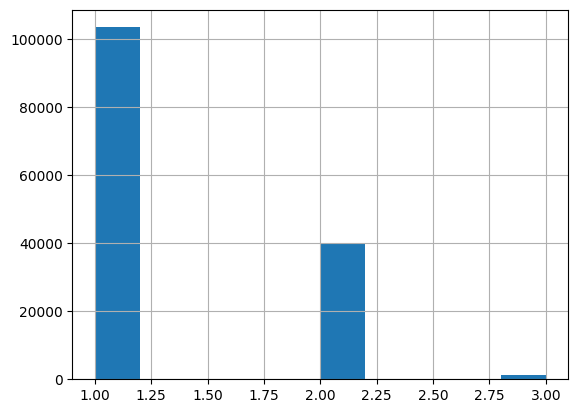

In [ ]:
df_clusters = interesting_df.copy()
df_clusters['cluster'] = km.labels_
df_clusters['player positions'] = df['player_positions']
df_clusters['player position'] = df['player_positions'].apply(lambda positions: {position_mapper(pos.strip()) for pos in positions.split(',')})
df_clusters['player positions count'] = df_clusters['player position'].apply(len)
df_clusters['player positions count'].hist()

Expandimos cada fila con múltiples posiciones en múltiples filas con una sola posicion

In [ ]:
df_cluster_single_position = df_clusters.explode('player position')

Veamos como se distribuyen las jugadoras respecto de la posicion en la que juegan. Podemos observar que la distribucion es bastante pareja

<Axes: >

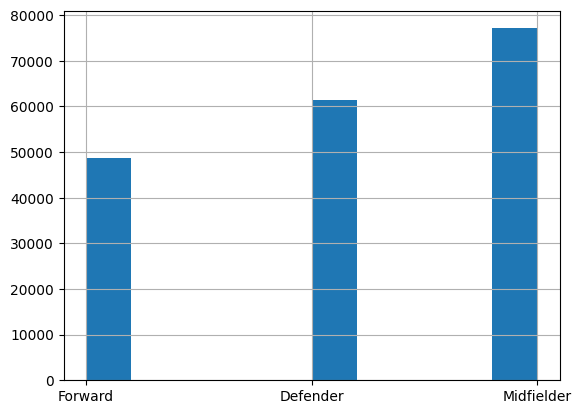

In [ ]:
df_cluster_single_position['player position'].hist()

Podemos observar que el cluster 0 esta compuesto mayoritariamente por defensoras

<Axes: >

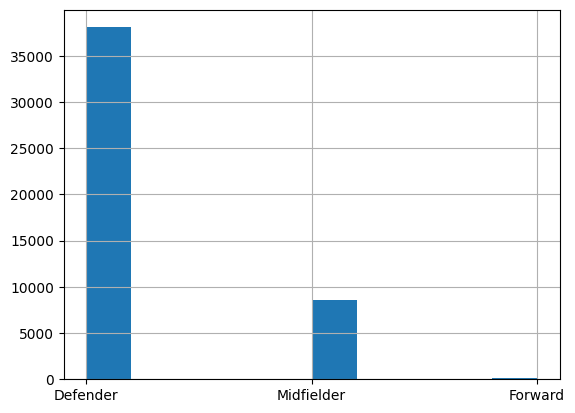

In [ ]:
df_cluster_single_position[df_cluster_single_position['cluster']==0]['player position'].hist()

El cluster 1 mayoritariamente por delanteras. Comparando este grafico con el anterior podriamos decir que es mas comun que un delantero juegue tambien como mediocampistas a que un defensor juegue como mediocampista

<Axes: >

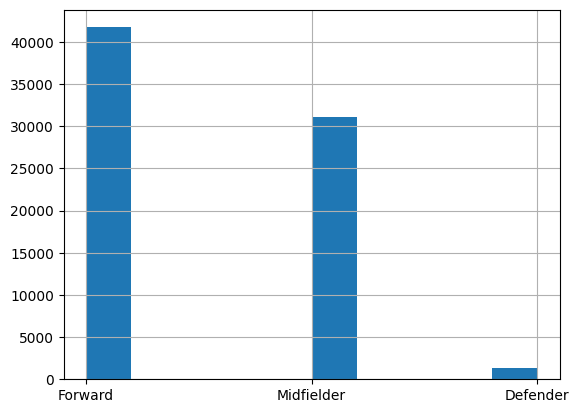

In [ ]:
df_cluster_single_position[df_cluster_single_position['cluster']==1]['player position'].hist()

Y finalmente el cluster 2 mayoritariamente por mediocampistas. Tambien podemos observar que en este cluster a diferencia de los otros, la cantidad de jugadoras que ademas de ser mediocampistas son categorizadas como potenciales defensoras o delanteras es mas grande respecto de los otros graficos. Posiblemente porque al jugar al medio del campo se tiene una cercania mayor tanto con delanteros como defensores

<Axes: >

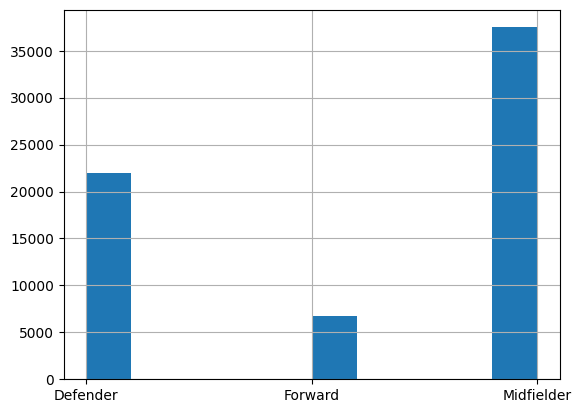

In [ ]:
df_cluster_single_position[df_cluster_single_position['cluster']==2]['player position'].hist()

Podemos concluir que el algoritmo de k-means logro diferenciar hasta cierto punto la posicion de un jugador basandose en sus skills

#### 4.2- Mean-shift

Usamos estimate_bandwidth para estimar el hiperparámetro válido para correr em algoritmo.

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(interesting_df, quantile=0.1, n_samples=500)
print("Bandwidht con estimate_bandwidth ",bandwidth)

# Corremos el modelo
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(interesting_df)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Bandwidht con estimate_bandwidth  71.55363406756541
Cantidad de clusters encontrados por Mean Shift : 2


Sólo encuentra 2 clusters.

Graficamos. Antes, elegimos aleatoriamente 2 variables (physic y skill_dribbling)


In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=interesting_df.physic, y=interesting_df.skill_dribbling,
                           mode='markers',
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[MeanShift_clusters]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title="a"),
                yaxis=dict(title="b"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

#En Colab
fig.show(renderer="colab")

Ahora seguimos con lo correspondiente al punto 5: analizar cómo están conformados cada uno de los clusters.

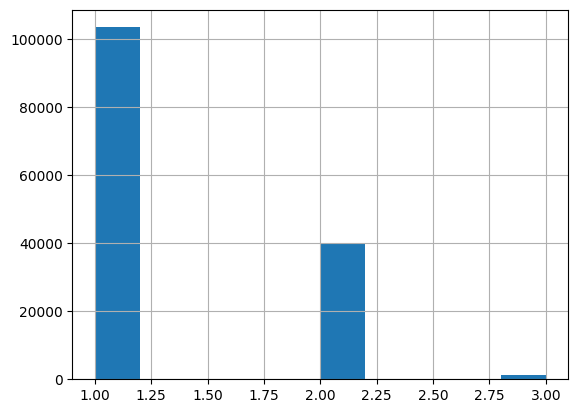

In [ ]:
df_clusters2 = interesting_df.copy()
df_clusters2['cluster'] = ms.labels_
df_clusters2['player positions'] = df['player_positions']
df_clusters2['player position'] = df['player_positions'].apply(lambda positions: {position_mapper(pos.strip()) for pos in positions.split(',')})
df_clusters2['player positions count'] = df_clusters2['player position'].apply(len)
df_clusters2['player positions count'].hist()
df_cluster2_single_position = df_clusters2.explode('player position')

Como se ve a continuación, en el cluster 0 hay minoría de delanteras, mayoría de defensoras y bastantes mediocampistas.

<Axes: >

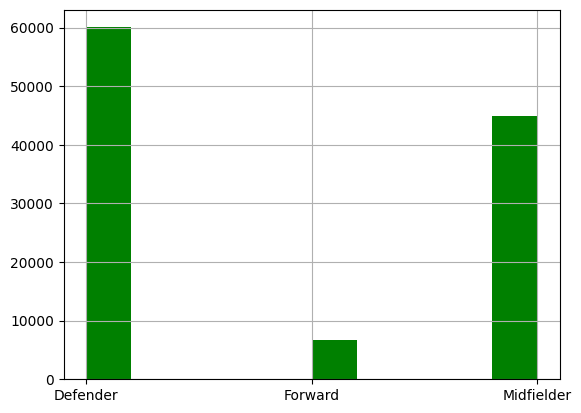

In [ ]:
df_cluster2_single_position[df_cluster2_single_position['cluster']==0]['player position'].hist(color='green')

En el cluster 1 hay mayoría de delanteras y casi ninguna defensoras.

<Axes: >

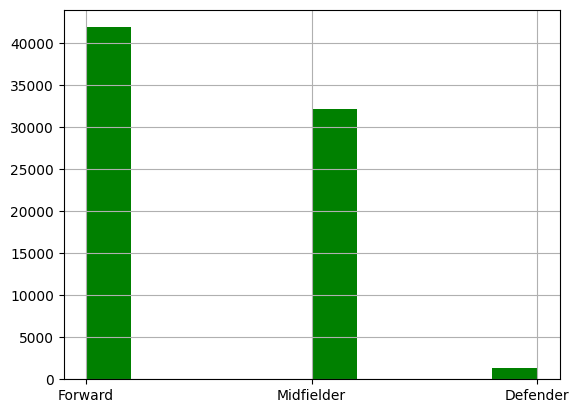

In [ ]:
df_cluster2_single_position[df_cluster2_single_position['cluster']==1]['player position'].hist(color='green')

Sospechamos que este algoritmo diferenció entre jugadoras 'ofensivas' y jugadoras 'defensivas'. Esto implicaría que los mediocampistas en el cluster 0 son mediocampistas más defensivas, y en el cluster 1 son mediocampistas ofensivas. Para corroborar esto pasamos a modificar la clasificación de posiciones para captar estas diferencias.

In [ ]:
forwards = ['RF','ST','LW', 'LF', 'RS', 'LS','RW','CF']
offensive_midfielders = ['CAM','RAM','LAM','RM','LM']
deffensive_midfielders = ['CDM','RDM','LDM','CM','RCM','LCM']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def position_mapper_amplio(position):
    if position in forwards:
        return 'Forward'

    elif position in offensive_midfielders:
        return 'Offensive Midfielder'

    elif position in deffensive_midfielders:
        return 'Deffensive Midfielder'

    elif position in defenders:
        return 'Defender'

    elif position in goalkeepers:
        return 'GK'

    else:
        return 'nan'

df_clusters3 = interesting_df.copy()
df_clusters3['cluster'] = ms.labels_
df_clusters3['player positions'] = df['player_positions']
df_clusters3['player position'] = df['player_positions'].apply(lambda positions: {position_mapper_amplio(pos.strip()) for pos in positions.split(',')})
df_clusters3['player positions count'] = df_clusters3['player position'].apply(len)
df_cluster3_single_position = df_clusters3.explode('player position')

Como se ve a continuación, efectivamente se confirma que en el cluster 0 los jugadores que lo conforman son eminentemente de carácter defensivo.

<Axes: >

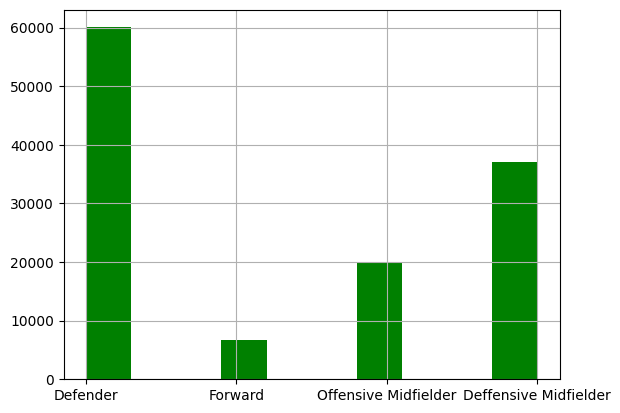

In [ ]:
df_cluster3_single_position[df_cluster3_single_position['cluster']==0]['player position'].hist(color='green')

Con el cluster 1 la hipótesis se confirma incluso con más fuerza: las jugadoras que lo conforman son de carácter ofensivo.

<Axes: >

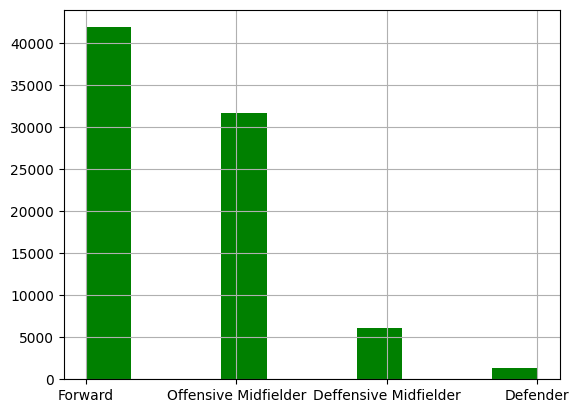

In [ ]:
df_cluster3_single_position[df_cluster3_single_position['cluster']==1]['player position'].hist(color='green')

###6- Transformaciones

#### 6.1- K-Medias

Vamos a utilizar t-SNE para proyectar nuestro dataset en dos dimensiones para poder visualizarlo mas facilmente.

Usaremos una muestra de 5000 elementos para agilizar el proceso

In [ ]:
from sklearn import manifold
n_sne = 5000
tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
df_sne_with_position = df_cluster_single_position.sample(n=n_sne)
df_sne = df_sne_with_position.drop(columns=['player position', 'player positions', 'cluster'])
X_tsne = tsne.fit_transform(df_sne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 24.570251
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.933884
[t-SNE] KL divergence after 1000 iterations: 0.514856


In [ ]:
bool_striker = df_sne_with_position["player position"] == 'Forward'
bool_midfielder = df_sne_with_position["player position"] == 'Midfielder'
bool_defender = df_sne_with_position["player position"] == 'Defender'

palette=['#A2D5F2','red','orange']
striker = go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

midfielder = go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender = go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      opacity=0.7,marker=dict(color=palette[2],size=5),mode='markers')

data=[striker,midfielder,defender]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Se puede observar una clara separación entre delanteros y defensores, mientras que los mediocampistas están dispersos por toda la visualización.

Se puede notar tambien que hay un solapamiento mayor entre delanteros y mediocampistas que entre mediocampistas y defensores como ya vimos con anterioridad

Ahora utiliecmos PCA para proyectar los mismos datos

In [ ]:
from sklearn import (preprocessing, decomposition)
import time

In [ ]:
df_pca_positions = df_cluster_single_position.sample(n = 5000)
df_pca = df_pca_positions.drop(columns=['player position', 'player positions', 'cluster'])
std_scale = preprocessing.StandardScaler().fit(df_pca)
df_pca_scaled = std_scale.transform(df_pca)

pca = decomposition.PCA(n_components=2)
pca.fit(df_pca_scaled)
X_pca_projected = pca.transform(df_pca_scaled)

In [ ]:
bool_striker_pca = df_pca_positions["player position"] == 'Forward'
bool_midfielder_pca = df_pca_positions["player position"] == 'Midfielder'
bool_defender_pca = df_pca_positions["player position"] == 'Defender'

palette=['#A2D5F2','red','orange']
striker = go.Scatter(x = X_pca_projected[bool_striker_pca,0], y = X_pca_projected[bool_striker,1],name='Striker',
                      opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

midfielder = go.Scatter(x = X_pca_projected[bool_midfielder_pca,0], y = X_pca_projected[bool_midfielder,1],name='Midfielder',
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender = go.Scatter(x = X_pca_projected[bool_defender_pca,0], y = X_pca_projected[bool_defender,1],name='Defender',
                      opacity=0.7,marker=dict(color=palette[2],size=5),mode='markers')

data=[striker,midfielder,defender]

layout = go.Layout(title="PCA - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Confirmamos el mismo analisis que cuando utilizamos tSNE

#### 6.2- Mean-shift

Repetimos el procedimiento anterior de t-SNE

In [ ]:
n_sne = 5000
tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
df_sne3_with_position = df_cluster3_single_position.sample(n=n_sne)
df_sne3 = df_sne3_with_position.drop(columns=['player position', 'player positions', 'cluster'])
X_tsne = tsne.fit_transform(df_sne3)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.318s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 24.411624
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.063232
[t-SNE] KL divergence after 1000 iterations: 0.519570


In [ ]:
bool_striker = df_sne3_with_position["player position"] == 'Forward'
bool_off_midfielder = df_sne3_with_position["player position"] == 'Offensive Midfielder'
bool_def_midfielder = df_sne3_with_position["player position"] == 'Deffensive Midfielder'
bool_defender = df_sne3_with_position["player position"] == 'Defender'

palette=['#A2D5F2','red','green','orange']
striker = go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

off_midfielder = go.Scatter(x=X_tsne[bool_off_midfielder,0], y=X_tsne[bool_off_midfielder,1],name='Offensive Midfielder',
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

def_midfielder = go.Scatter(x=X_tsne[bool_def_midfielder,0], y=X_tsne[bool_def_midfielder,1],name='Deffensive Midfielder',
                      opacity=0.6,marker=dict(color=palette[2],size=5),mode='markers')

defender = go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

data = [striker,off_midfielder,def_midfielder,defender]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

En este caso, en el que distinguimos mediocampistas ofensivos de los defensivos, se logra apreciar que los delanteros ('strikers') y los defensores están en extremos opuestos. Por su parte, los mediocampistas ofensivos se mezclan en mucha mayor medida con los delanteros, como era de esperar. Asimismo, los meiocampistas defensivos se mezclan en mayor medida con los defensores.

####6.3 Utilizando PCA para preprocesado de datos

Comparemos K-mean utilizando preprocesado de datos con PCA vs K-mean sin pre procesado.

In [ ]:
x = interesting_df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [ ]:
pca_new = decomposition.PCA(n_components = 2)
reduced = pd.DataFrame(pca_new.fit_transform(X_norm))
scores_new = [KMeans(n_clusters=i).fit(reduced).inertia_ for i in range(2,12)]

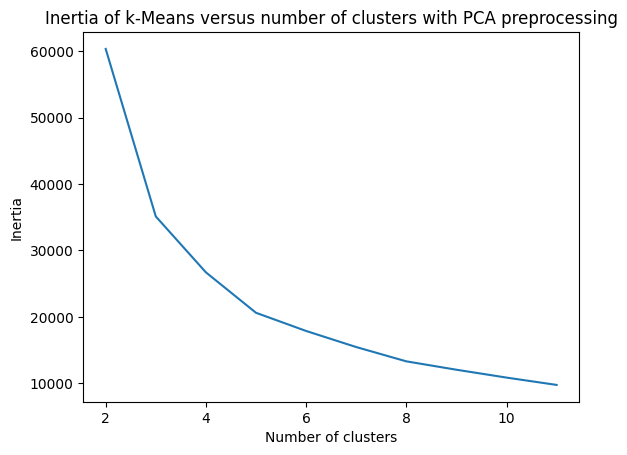

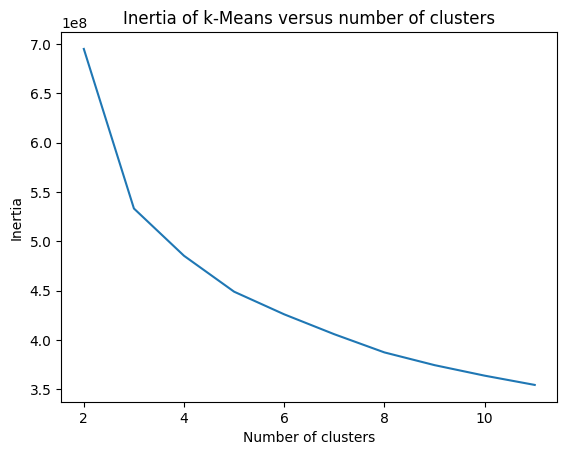

In [ ]:
plt.figure(1)
plt.plot(np.arange(2, 12), scores_new)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters with PCA preprocessing")

plt.figure(2)
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

plt.show()

Vemos que la curva es identida, por ende elejiremos el mismo numero de clusters que antes (3).

In [ ]:
n_clust_new = 3
km_new = KMeans(n_clusters = n_clust_new, random_state = 0)
km_new.fit(reduced)
clusters_new = km_new.labels_

In [ ]:
df_clusters_new = interesting_df.copy()
df_clusters_new['cluster'] = km_new.labels_
df_clusters_new['player positions'] = df['player_positions']
df_clusters_new['player position'] = df['player_positions'].apply(lambda positions: {position_mapper(pos.strip()) for pos in positions.split(',')})
df_clusters_new['player positions count'] = df_clusters['player position'].apply(len)
df_cluster_single_position_new = df_clusters_new.explode('player position')

In [ ]:
df_pca_positions_new = df_cluster_single_position_new.sample(n = 5000)
df_pca_new = df_pca_positions_new.drop(columns=['player position', 'player positions', 'cluster'])
std_scale_new = preprocessing.StandardScaler().fit(df_pca_new)
df_pca_scaled_new = std_scale_new.transform(df_pca_new)

pca_new = decomposition.PCA(n_components=2)
pca_new.fit(df_pca_scaled_new)
X_pca_projected_new = pca_new.transform(df_pca_scaled_new)

In [ ]:
bool_striker_pca_new = df_pca_positions_new["player position"] == 'Forward'
bool_midfielder_pca_new = df_pca_positions_new["player position"] == 'Midfielder'
bool_defender_pca_new = df_pca_positions_new["player position"] == 'Defender'

palette=['#A2D5F2','red','orange']
striker = go.Scatter(x = X_pca_projected_new[bool_striker_pca_new,0], y = X_pca_projected_new[bool_striker,1],name='Striker',
                      opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

midfielder = go.Scatter(x = X_pca_projected_new[bool_midfielder_pca_new,0], y = X_pca_projected_new[bool_midfielder,1],name='Midfielder',
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender = go.Scatter(x = X_pca_projected_new[bool_defender_pca_new,0], y = X_pca_projected_new[bool_defender,1],name='Defender',
                      opacity=0.7,marker=dict(color=palette[2],size=5),mode='markers')

data=[striker,midfielder,defender]

layout = go.Layout(title="K-MEAN PCA preproccesing wiht PCA Analysiss - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Vemos que el resultado es identico a nuestro analisis anterior sin preprocesado